In [3]:
from urllib.request import urlretrieve

import pandas as pd

import numpy as np

import os

# Reference https://jovian.ml/learn/machine-learning-with-python-zero-to-gbms/lesson/linear-regression-with-scikit-learn

# QUESTION: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

# Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

# You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

os.makedirs('./data', exist_ok=True)

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

urlretrieve(medical_charges_url, './data/medical.csv')

medical_df = pd.read_csv('./data/medical.csv')

# 1338 rows × 7 columns
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Let's check the data types of each column

medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Lets check if there are any missing values

# Different ways to check for missing values
medical_df.isnull().sum()
# medical_df.isna().sum()
# medical_df[medical_df.isna().any(axis=1)]

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Let's check for some statistics on numeric columns

medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
# This ensures plots are displayed in Jupyter notebook as an output instead of in a popup
%matplotlib inline

import matplotlib.dates as mdates
import seaborn as sns
import calendar

from plotly.offline import init_notebook_mode, iplot, plot, download_plotlyjs

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Binning is a process of grouping a set of continuous or numerical data points into a smaller number of discrete "bins" or intervals. In the context of creating visualizations like histograms, bins help in presenting a more interpretable and insightful representation of the data distribution.

# In the provided statement about age distribution, the objective of using bins is to visualize the distribution of ages effectively. The dataset contains age data, which is a numeric column with a range from 18 to 64. Instead of representing each individual age as a separate data point, the ages are grouped into bins, each corresponding to a specific range of ages (e.g., one bin for each year).

fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
# Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'grey','blue', 'red'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
medical_df.smoker.value_counts()

fig = px.histogram(medical_df, 
                   x='smoker', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Smokers vs. Non-smokers')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

# The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

# We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

# The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

# The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

# The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

In [17]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [18]:
fig = px.violin(medical_df, y="charges", x="region", color="sex", box=True, points="all",
          hover_data=["sex"])
fig.show()

In [40]:
# fig = px.violin(medical_df, y="charges", x="children")
# fig.show()
fig = px.violin(medical_df, y="charges", x="children", box=True, points="all",
          hover_data=["sex"])
fig.show()
# fig = px.violin(medical_df, y="charges", x="children", color="sex", box=True, points="all",
#           hover_data=["sex"])
# fig.show()

# 

In [23]:
# Compute correlation between columns
medical_df.charges.corr(medical_df.age)
medical_df.charges.corr(medical_df.bmi)
print("Correlation between charges and age: ", medical_df.charges.corr(medical_df.age))
print("Correlation between charges and bmi: ", medical_df.charges.corr(medical_df.bmi))

Correlation between charges and age:  0.2990081933306476
Correlation between charges and bmi:  0.19834096883362884


In [24]:
# To compute the correlation for categorical columns, they must first be converted into numeric columns.
# We want to find the correlation between charges and smoker.
# But first we need to convert the smoker column into numeric values.
# We can use the map() function to do this.

smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984767

In [26]:
# We can use the panda library to find the correlation between columns
# On include numeric columns

medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [27]:
# Let's use a heatmap to visualize the correlation

fig = px.imshow(medical_df.corr(numeric_only=True), text_auto=True)
fig.show()

In [30]:


px.scatter(medical_df, x='age', y='charges')
# px.scatter(medical_df, x='age', y='charges', color='smoker', trendline="ols")

## Linear Regression using a Single Feature

# We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. 

In [41]:
# First, let's create a data frame containing just the data for non-smokers.

non_smokers = medical_df[medical_df['smoker'] == 'no']
# non_smokers = medical_df[medical_df.smoker == 'no']
non_smokers

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [43]:
# Let's visualize our dataframe

fig = px.scatter(non_smokers,x="age", y="charges")

fig.show()



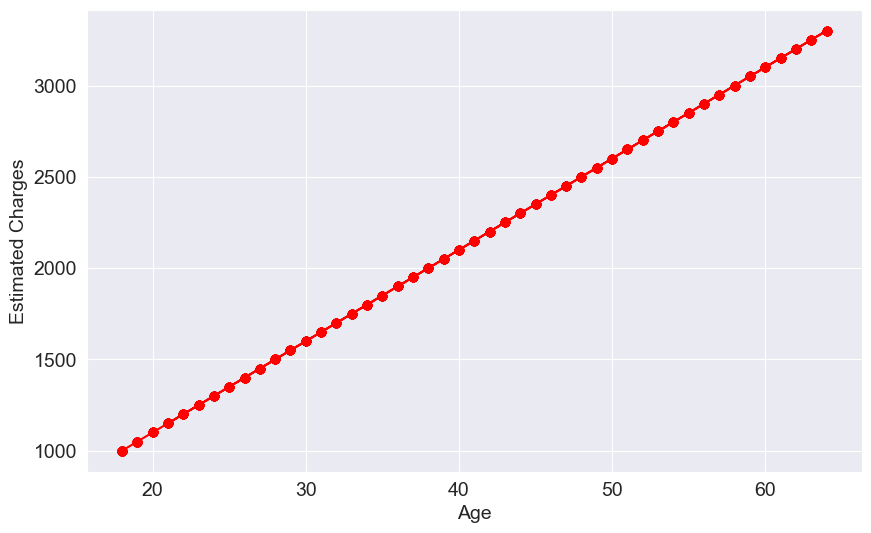

In [45]:

# w (called "slope") and b (called "intercept").

# In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

# charges=w×age+b

# We'll try determine w and b for the line that best fits the data.

# This technique is called linear regression, and we call the above equation a linear regression model, because it models the relationship between "age" and "charges" as a straight line.

# The numbers w and b are called the parameters or weights of the model.

# The values in the "age" column of the dataset are called the inputs to the model and the values in the charges column are called "targets".

def estimate_charges(age, w, b):
    return w * age + b

w = 50
b = 100

ages = non_smokers.age
estimated_charges = estimate_charges(ages, w, b)

# fig = px.line(estimate_charges, x="Age", y="Estimated Charges", title='Life expectancy in Canada')
# fig.show()

plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');